# Session 1: Terminology, Baselines, Decision Trees

### Learning outcomes 
From this lecture, you will be able to 

- identify whether a given problem could be solved using supervised machine learning or not; 
- differentiate between supervised and unsupervised machine learning;
- explain machine learning terminology such as features, targets, predictions, training, and error;
- differentiate between classification and regression problems;
- use `DummyClassifier` and `DummyRegressor` as baselines for machine learning problems;
- explain the `fit` and `predict` paradigm and use `score` method of ML models; 
- broadly describe how decision tree prediction works;
- use `DecisionTreeClassifier` and `DecisionTreeRegressor` to build decision trees using `scikit-learn`; 
- visualize decision trees; 
- explain the difference between parameters and hyperparameters; 
- explain the concept of decision boundaries;
- explain the relation between model complexity and decision boundaries.

## Terminology [[video](https://youtu.be/YNT8n4cXu4A)]

You will see a lot of variable terminology in machine learning and statistics. In this session, we'll familiarize ourselves with some common terminology in supervised machine learning and some of the base concepts in scikit-learn. To illustrate these concepts, we'll be using a simple decision tree model together with a toy data set about grade prediction.


### Tabular data
In supervised machine learning, the input data is typically organized in a **tabular** format, where rows are **examples** and columns are **features**. One of the columns is typically the **target**. 

Let's introduce the toy dataset and see how this terminology applies to it. Imagine that you are taking a course with four home work assignments and two quizzes. You and your friends are quite nervous about your quiz2 grades and you want to know how will you do based on your previous performance, past ML experience, and class attendance. So you decide to collect some data from your friends from last year and train a supervised machine learning model for quiz2 grade prediction. 

![](img/sup-ML-terminology.png)

<!-- <img src="img/sup-ml-terminology.png" height="1000" width="1000">  -->

**Features** 
: Features are relevant characteristics of the problem, usually suggested by experts. Features are typically denoted by $X$ and the number of features is usually denoted by $d$.  

**Target**
: Target is the feature we want to predict (typically denoted by $y$). 

**Example** 
: A row of feature values. When people refer to an example, it may or may not include the target corresponding to the feature values, depending upon the context. The number of examples is usually denoted by $n$. 

**Training**
: The process of learning the mapping between the features ($X$) and the target ($y$). 

#### Alternative terminology for examples, features, targets, and training

- **examples** = rows = samples = records = instances = observations
- **features** = inputs = predictors = explanatory variables = regressors = independent variables = covariates
- **targets** = outputs = outcomes = response variable = dependent variable = labels (if categorical).
- **training** = learning = fitting

#### Example: Tabular data for grade prediction

The tabular data usually contains both: the features (`X`) and the target (`y`). Let's read in a CSV file that contains our data using the pandas library.

In [1]:
import pandas as pd


classification_df = pd.read_csv("data/quiz2-grade-toy-classification.csv")
classification_df

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2
0,1,1,92,93,84,91,92,A+
1,1,0,94,90,80,83,91,not A+
2,0,0,78,85,83,80,80,not A+
3,0,1,91,94,92,91,89,A+
4,0,1,77,83,90,92,85,A+
5,1,0,70,73,68,74,71,not A+
6,1,0,80,88,89,88,91,A+
7,0,1,95,93,69,79,75,not A+
8,0,0,97,90,94,99,80,not A+
9,1,1,95,95,94,94,85,not A+


<br><br>

## Model creation

Let's build our first model!

### Supervised learning (Reminder)

- Supervised machine learning is about function approximation, i.e., finding the mapping function between `X` and `y`.
- Training data $\rightarrow$ Machine learning algorithm $\rightarrow$ ML model 
- Unseen test data + ML model $\rightarrow$ predictions
![](img/sup-learning.png)
<!-- <img src="img/sup-learning.png" height="1000" width="1000">  -->

Let's build a very simple supervised machine learning model for quiz2 grade prediction problem.
We're going to use the same data on grades that we read in above:

In [2]:
# `head` show the first few rows of the df
classification_df.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2
0,1,1,92,93,84,91,92,A+
1,1,0,94,90,80,83,91,not A+
2,0,0,78,85,83,80,80,not A+
3,0,1,91,94,92,91,89,A+
4,0,1,77,83,90,92,85,A+


One question we might ask ourselves right of the bat is which grade was most common on quiz2 last year, `A+` or `not A+`?

In [3]:
classification_df['quiz2'].value_counts()

not A+    11
A+        10
Name: quiz2, dtype: int64

Seems like `not A+` occurs more frequently than `A+`. What if we build a model that just predict `not A+` all the time? Predicting the majority class like this is often called a "baseline" model and it is a good way to introduce the scikit-learn syntax before we get into a more complex model.

### Baselines [[video](https://youtu.be/6eT5cLL-2Vc)]

**Baseline**
: A simple machine learning algorithm based on simple rules of thumb. 

- For example, most frequent baseline always predicts the most frequent label in the training set. 
- Baselines provide a way to sanity check your machine learning model.    

### `DummyClassifier` 

- `sklearn`'s baseline model for classification  
- Let's train `DummyClassifier` on the grade prediction dataset. 

### Steps to train a classifier using `sklearn` 

1. Read the data
2. Create $X$ and $y$
3. Create a classifier object
4. Train/fit the classifier
5. Assess/score the model performance
6. Predict on new examples

#### 1. Reading the data

In [4]:
# We already did this, here is a reminder what the data looks like
classification_df.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2
0,1,1,92,93,84,91,92,A+
1,1,0,94,90,80,83,91,not A+
2,0,0,78,85,83,80,80,not A+
3,0,1,91,94,92,91,89,A+
4,0,1,77,83,90,92,85,A+


#### 2. Create $X$ and $y$

- $X$ &rarr; Feature vectors
- $y$ &rarr; Target

In [5]:
X = classification_df.drop(columns=["quiz2"])
X.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1
0,1,1,92,93,84,91,92
1,1,0,94,90,80,83,91
2,0,0,78,85,83,80,80
3,0,1,91,94,92,91,89
4,0,1,77,83,90,92,85


In [6]:
y = classification_df["quiz2"]
y.head()

0        A+
1    not A+
2    not A+
3        A+
4        A+
Name: quiz2, dtype: object

#### Create a classifier object

- `import` the appropriate classifier 
- Create an object of the classifier 

In [7]:
# Import the classifier
from sklearn.dummy import DummyClassifier


# Create a classifier object
dummy_clf = DummyClassifier()
dummy_clf

DummyClassifier()

#### Train/fit the model

- The "learning" is carried out when we call `fit` on the classifier object. 
- In the case of the dummy classifier, the learning is simply identifying the majority class.

In [8]:
dummy_clf.fit(X, y)

DummyClassifier()

#### Assess/score model performance

- How do you know how well your model is doing?
- We could compare which proportion of the predictions match the true value of the class:

In [9]:
pred = dummy_clf.predict(X)
pred

array(['not A+', 'not A+', 'not A+', 'not A+', 'not A+', 'not A+',
       'not A+', 'not A+', 'not A+', 'not A+', 'not A+', 'not A+',
       'not A+', 'not A+', 'not A+', 'not A+', 'not A+', 'not A+',
       'not A+', 'not A+', 'not A+'], dtype='<U6')

In [10]:
(pred == y).mean()

0.5238095238095238

- This scoring metric is called **accuracy**, and it is formally defined as:

    $accuracy = \frac{\text{correct predictions}}{\text{total examples}}$   

- Accuracy is not always the best metric to use (this is problem specific), but it is a good default so it is built into all scikit learn classifiers via the `score` method.

In [11]:
# We don't need to call `predict` when scoring, as this happens automatically under the hood
dummy_clf.score(X, y)

0.5238095238095238

Recall that in this baseline example we are always predicting the majority class, so the score is the same as the proportion of the majority class:

In [12]:
classification_df['quiz2'].value_counts(normalize=True)

not A+    0.52381
A+        0.47619
Name: quiz2, dtype: float64

#### `predict` the target of new examples

- We can predict the target of new examples by calling `predict` on the classifier object. 
- This will use the fitted/trained classifier to predict the class of the target column

Once we are happy with the score our model have, we would use it to predict on new unseen data points, which in this case would be our own grades from this year's class:

In [13]:
new_examples = pd.DataFrame.from_records([[0, 1, 92, 90, 95, 93, 92], [1, 1, 92, 93, 94, 92, 90]], columns=X.columns)
new_examples

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1
0,0,1,92,90,95,93,92
1,1,1,92,93,94,92,90


In [14]:
dummy_clf.predict(new_examples)

array(['not A+', 'not A+'], dtype='<U6')

#### `fit`, `score`, and `predict` summary

Here is the general pattern when we build ML models using `sklearn`. 

In [15]:
# Create `X` and `y` from the given data
X = classification_df.drop(columns=["quiz2"])
y = classification_df["quiz2"]

clf = DummyClassifier() # Create a class object
clf.fit(X, y) # Train/fit the model
clf.score(X, y) # Assess the model

0.5238095238095238

In [16]:
# Predict on new data
clf.predict([[0, 1, 92, 90, 95, 93, 92]])

array(['not A+'], dtype='<U6')

### [`DummyRegressor`](https://scikit-learn.org/0.15/modules/generated/sklearn.dummy.DummyRegressor.html)

You can also do the same thing for regression problems using `DummyRegressor`, which predicts a constant value of the training set for all examples, e.g. the mean or median.

- Let's build a regression baseline model using `sklearn`.
- First we need a data set that is amenable to regression, e.g. predicting the percentage score on quiz2 instead of the "A+"/"not-A" label.

In [17]:
# 1. Read in the data
regression_df = pd.read_csv("data/quiz2-grade-toy-regression.csv")
regression_df

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2
0,1,1,92,93,84,91,92,90
1,1,0,94,90,80,83,91,84
2,0,0,78,85,83,80,80,82
3,0,1,91,94,92,91,89,92
4,0,1,77,83,90,92,85,90
5,1,0,70,73,68,74,71,75
6,1,0,80,88,89,88,91,91


In [18]:
# 2. Split into X (features) and y (target)
X = regression_df.drop(columns=["quiz2"]) # Create `X` and `y` from the given data
y = regression_df["quiz2"]

In [19]:
from sklearn.dummy import DummyRegressor

# 3. Create a classifier object
reg = DummyRegressor()

In [20]:
# 4. Train/fit the classifier
reg.fit(X, y)

DummyRegressor()

In [21]:
# 5. Score/assess the model performance
reg.score(X, y)

0.0

- The `fit` and `predict` paradigms similar to classification. The `score` method in the context of regression returns somethings called [$R^2$ score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score), which quantifies how much better the model performs than what predicting the mean for all values.
    - For `DummyRegressor` the score is 0, because it is predicting the mean, which is the same as what R2 score compares against.
    - The maximum $R^2$ is 1 for predictions that are exactly the same number as the real values.

In [22]:
# 6. Predict on new examples
new_examples = pd.DataFrame.from_records([[0, 1, 92, 90, 95, 93, 92], [1, 1, 92, 93, 94, 92, 90]], columns=X.columns)
new_examples

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1
0,0,1,92,90,95,93,92
1,1,1,92,93,94,92,90


In [23]:
reg.predict(new_examples)

array([86.28571429, 86.28571429])

<br><br>

## ❓❓ Questions for you

1. Order the steps below to build ML models using `sklearn`. 
    - `score` to evaluate the performance of a given model
    - `predict` on new examples 
    - Creating a model instance
    - Creating `X` and `y` 
    - `fit`
    - Read in the data

<br><br><br><br>

## Decision trees [[video](https://youtu.be/Hcf19Ij35rA)]

### Writing a traditional program to predict quiz2 grade

- Can we do better than the baseline? 
- Forget about ML for a second. If you are asked to write a program to predict whether a student gets an A+ or not in quiz2, how would you go for it?  
- For simplicity, let's binarize the feature values. 

![](img/quiz2-grade-toy.png)

<!-- <img src="img/quiz2-grade-toy.png" height="700" width="700">  -->


- Is there a pattern that distinguishes yes's from no's and what does the pattern say about today? 
- How about a rule-based algorithm with a number of *if else* statements?  
    ```
    if class_attendance == 1 and quiz1 == 1:
        quiz2 == "A+"
    elif class_attendance == 1 and lab3 == 1 and lab4 == 1:
        quiz2 == "A+"
    ...
    ```

- How many possible rule combinations there could be with the given 7 binary features? 
    - Gets unwieldy to do by hand pretty quickly 

### Decision tree algorithm 

- A machine learning algorithm to derive such rules from data in a principled way.  
- Have you ever played [20-questions game](https://en.wikipedia.org/wiki/Twenty_questions)? Decision trees are based on the same idea! 
- Each node either represents a question or an answer. The terminal nodes (called leaf nodes) represent answers. 

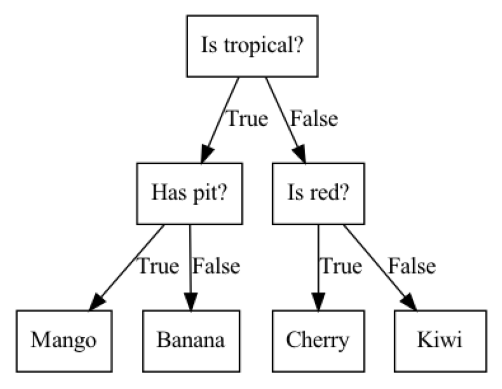

### Some terminology related to trees 

Here is a commonly used terminology in a typical representation of decision trees. 

**A root node**
: represents the first condition to check or question to ask

**A branch**
: connects a node (condition) to the next node (condition) in the tree. Each branch typically represents either true or false. 

**An internal node** 
: represents conditions within the tree

**A leaf node**
: represents the predicted class/value when the path from root to the leaf node is followed. 

**Tree depth**
: The number of edges on the path from the root node to the farthest away leaf node.

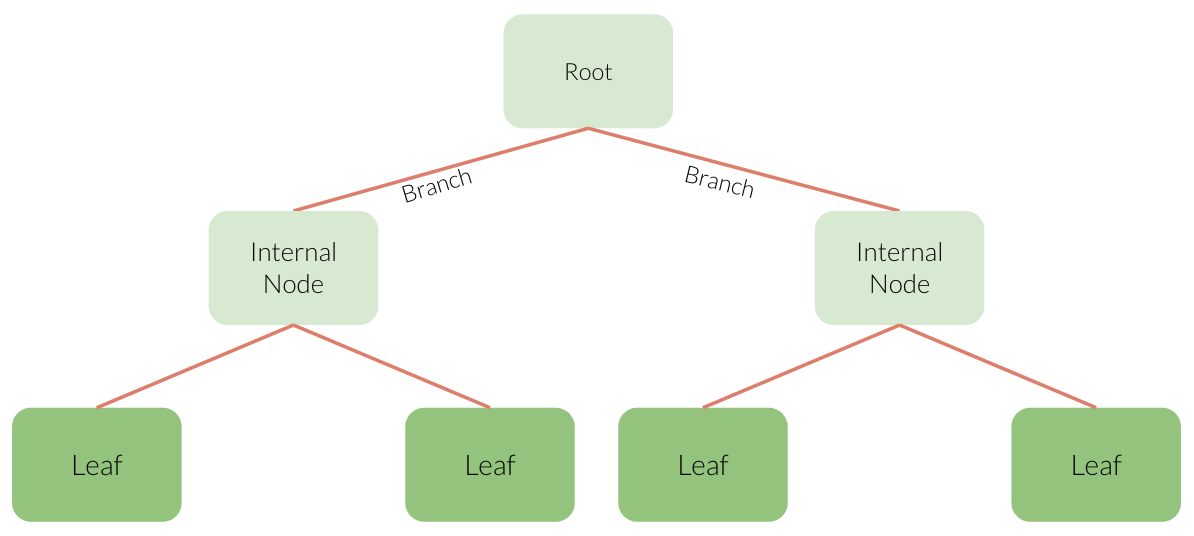

### Building decision trees with `sklearn`

Let's binarize our toy dataset for simplicity. 

In [24]:
X = classification_df.drop(columns=["quiz2"])
y = classification_df["quiz2"]

X_binary = X.copy()
columns = ["lab1", "lab2", "lab3", "lab4", "quiz1"]
X_binary[columns] = X[columns] >= 90  # T/F is treated the same as 1/0
X_binary.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1
0,1,1,True,True,False,True,True
1,1,0,True,True,False,False,True
2,0,0,False,False,False,False,False
3,0,1,True,True,True,True,False
4,0,1,False,False,True,True,False


In [25]:
y.head()

0        A+
1    not A+
2    not A+
3        A+
4        A+
Name: quiz2, dtype: object

#### `DummyClassifier` on quiz2 grade prediction toy dataset 

In [26]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_binary, y)
dummy_clf.score(X_binary, y)

0.5238095238095238

Nothing has changed for the dummy classifier since it is just predicting the majority class regardless of the input features

#### `DecisionTreeClassifier` on quiz2 grade prediction toy dataset 

- Let's `fit` a decision tree using `scikit-learn` and `predict` with it.
- Recall that `scikit-learn` uses the term `fit` for training/learning and uses `predict` for prediction. 

In [27]:
from sklearn.tree import DecisionTreeClassifier


# Create a decision tree
model = DecisionTreeClassifier(random_state=109)

# Fit a decision tree
model.fit(X_binary, y)

# Assess the model
model.score(X_binary, y)

0.9047619047619048

The decision tree classifier is giving much higher accuracy than the dummy classifier. That's good news! 

Let's visualize our tree using a built-in function in scikit-learn.

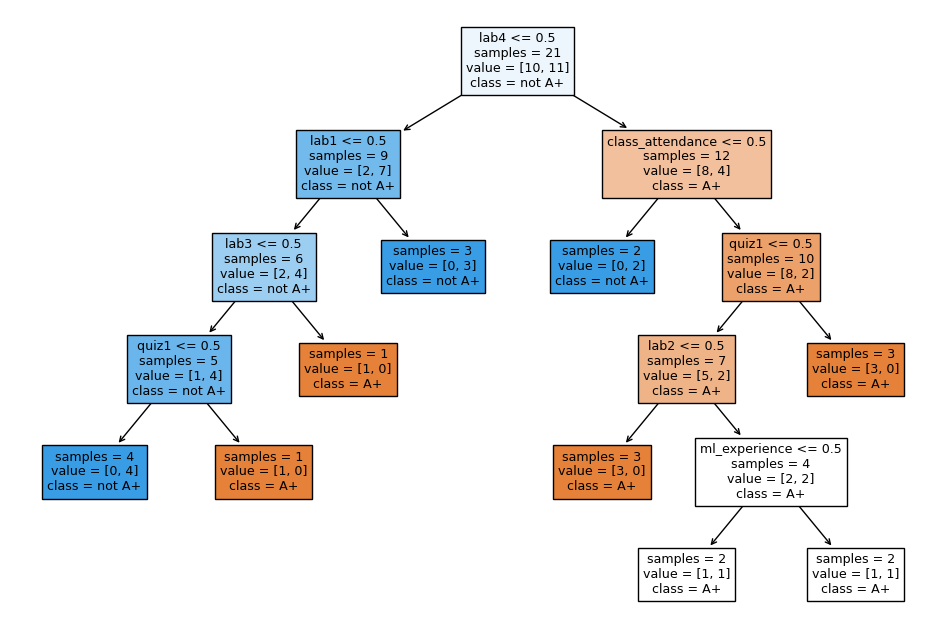

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plot_tree(
    model,
    feature_names=model.feature_names_in_,
    class_names=model.classes_,
    filled=True,
    impurity=False,
    ax=plt.subplots(figsize=(12, 8))[1],  # We need to create a figure to control the overall plot size
);

To make it more convenient and avoid retyping all this plotting code each time, we will put it inside a function that we can reuse with less typing and so that we avoid making mistakes, e.g. forget to update the code in all location when we change something in the plotting. Let's first see what a function looks like in Python.


In [29]:
def f(x):
    return x**2

f(3)

9

Now let's create one called `display_tree` for our plot tree code.

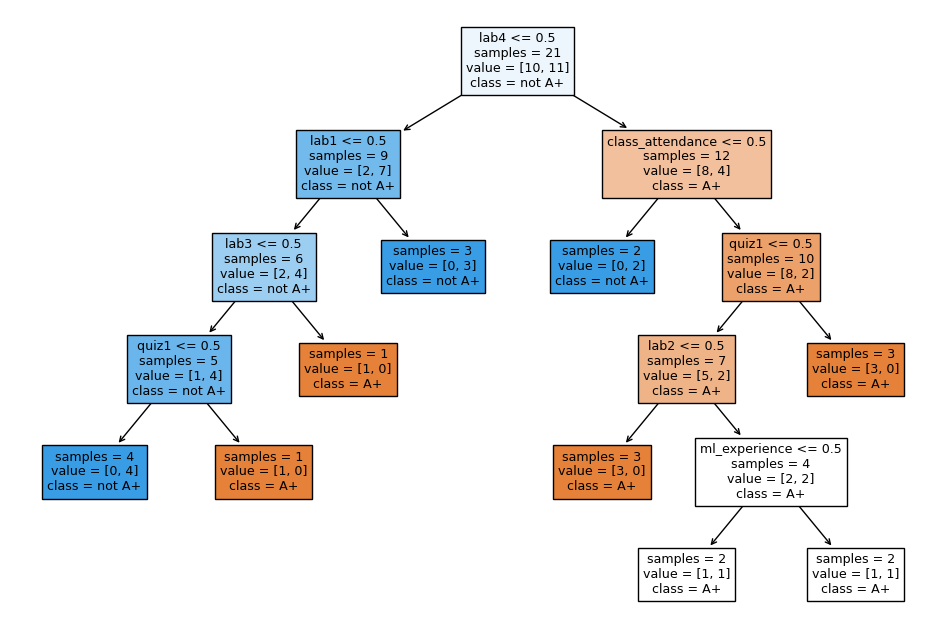

In [30]:
def display_tree(model, filled=True, impurity=False, ax=None, figsize=(12, 8), **kwargs):
    if ax is None:
        ax = plt.subplots(figsize=figsize)[1]
    return plot_tree(
        model,
        feature_names=model.feature_names_in_,
        class_names=model.classes_.astype(str) if hasattr(model, 'classes_') else None, # To avoid errors when using regression trees
        filled=filled,
        impurity=impurity,
        ax=ax,
        **kwargs,
    )

display_tree(model);

### How does `fit` work? 

- How was the tree created?
- `fit` creates the tree by deciding which feature to use and where to split them.
- The strategy is to find a split that make the the observations within the two created groups as similar as possible.
    - We say that we minimize the "impurity" or "heterogeniety" within the groups.
    - There are many ways to decide how to measure "similar" and we won't cover that in this workshop, but the most common (gini, information gain) are both supported via the `criterion` parameter.

### How does `predict` work? 

The syntax for predict is the same as for the dummy classifier

In [31]:
new_example = pd.DataFrame([[0, 1, 0, 0, 1, 1, 1]], columns=X.columns)
new_example

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1
0,0,1,0,0,1,1,1


What's the prediction for the new example?

In [32]:
model.predict(new_example)

array(['A+'], dtype=object)

In summary, given a learned tree and a test example, during prediction time,  
- Start at the top of the tree. Ask binary questions at each node and follow the appropriate path in the tree. Once you are at a leaf node, you have the prediction. 
- Note that the model only considers the features which are in the learned tree and ignores all other features. 

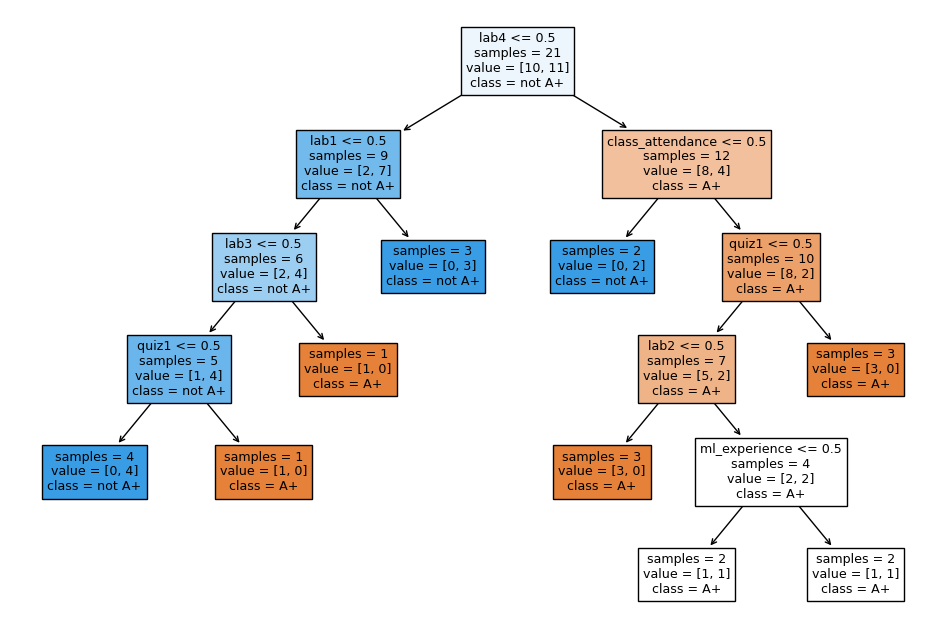

In [33]:
display_tree(model);

### Decision trees with continuous features

Let's use the actual scores for the assignments instead of our binary simplification.

In [34]:
X.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1
0,1,1,92,93,84,91,92
1,1,0,94,90,80,83,91
2,0,0,78,85,83,80,80
3,0,1,91,94,92,91,89
4,0,1,77,83,90,92,85


The model building process is the same

In [35]:
model = DecisionTreeClassifier()
model.fit(X, y)
model.score(X, y)

1.0

You can see that our score is now perfect, because of the increased resolution in the numerical features compared to the binary ones, which allowed the tree to keep splitting until all samples in the leaf nodes had the same label.

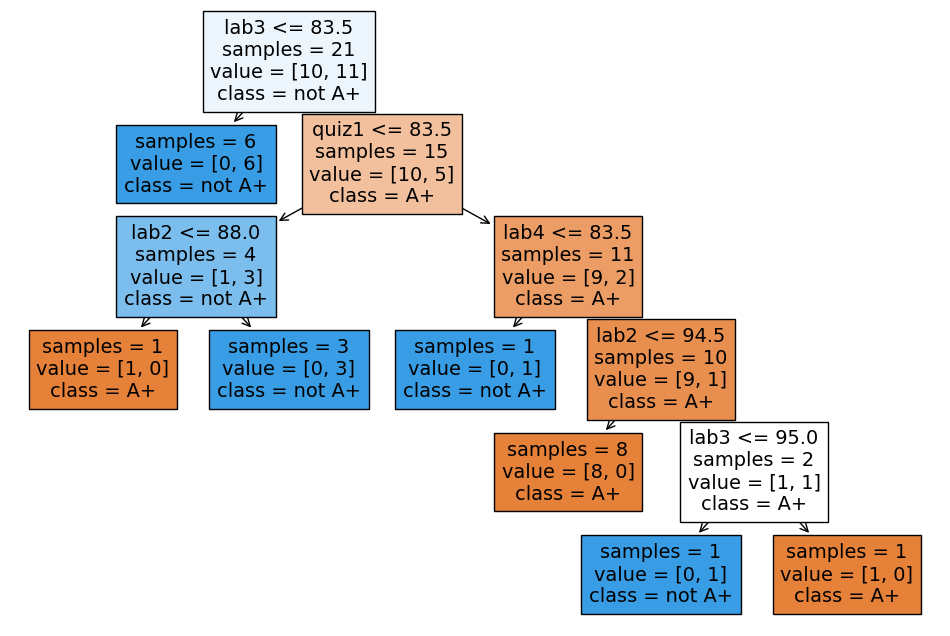

In [36]:
display_tree(model);

### Decision tree for regression problems

- We can also use decision tree algorithm for regression. 
- Instead of gini, we use [some other criteria](https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation) for splitting. A common one is mean squared error (MSE). (More on this in later videos.)
- `scikit-learn` supports regression using decision trees with `DecisionTreeRegressor` 
    - `fit` and `predict` paradigms similar to classification
    - `score` returns somethings called [$R^2$ score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score).     
        - The maximum $R^2$ is 1 for perfect predictions. 
        - It can be negative which is very bad (worse than `DummyRegressor`). 


In [37]:
regression_df

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2
0,1,1,92,93,84,91,92,90
1,1,0,94,90,80,83,91,84
2,0,0,78,85,83,80,80,82
3,0,1,91,94,92,91,89,92
4,0,1,77,83,90,92,85,90
5,1,0,70,73,68,74,71,75
6,1,0,80,88,89,88,91,91


In [38]:
X = regression_df.drop(["quiz2"], axis=1)
y = regression_df["quiz2"]

In [39]:
from sklearn.tree import DecisionTreeRegressor


reg_model = DecisionTreeRegressor()
reg_model.fit(X, y)
reg_model.score(X, y)

1.0

In [40]:
reg_model.predict(X)

array([90., 84., 82., 92., 90., 75., 91.])

Let's have a look at the visualization, here the color is just like a heatmap of the value for the target variable, since there are no classes.

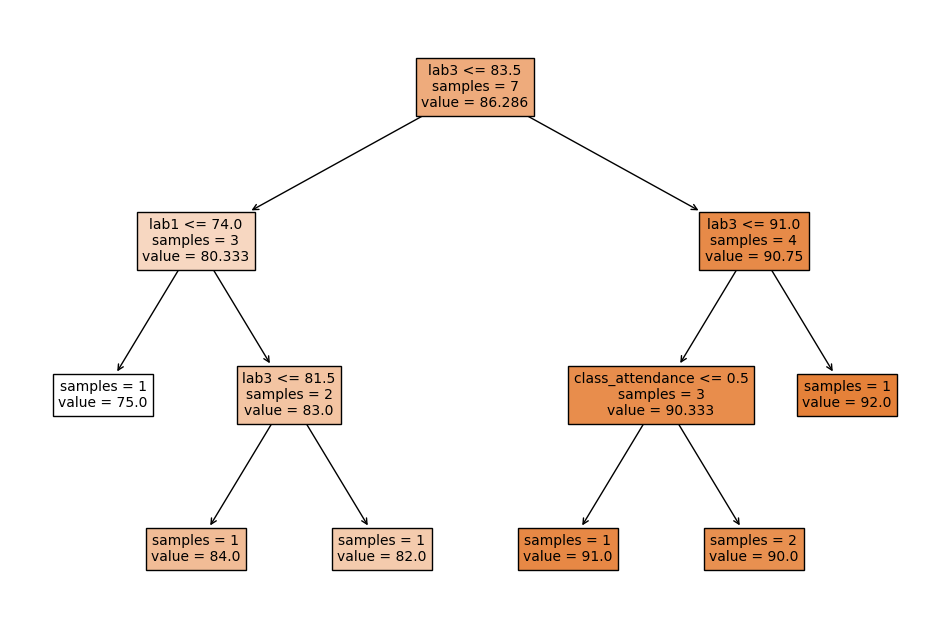

In [41]:
display_tree(reg_model);

<br><br>

## ❓❓ Questions for you

**Select all of the following statements which are TRUE.**

- (A) Change in features (i.e., binarizing features above) would change `DummyClassifier` predictions. 
- (B) `predict` takes only `X` as argument whereas `fit` and `score` take both `X` and `y` as arguments. 
- (C) For the decision tree algorithm to work, the feature values must be binary.
- (D) The prediction in a decision tree works by routing the example from the root to the leaf.  

<details><summary>Solutions:</summary>

(B), (D)
 
</details>

<br><br><br><br>

## Parameters and hyperparameters [[video](https://youtu.be/KEtsfXn4w2E)]


### Parameters 

- The decision tree algorithm primarily learns two things during training: 
    - the best feature to split on
    - the threshold for the feature to split on at each node
- These are called **parameters** of the decision tree model.  
- When predicting on new examples, we need parameters of the model. 

In [42]:
X = classification_df.drop(columns=["quiz2"])
y = classification_df["quiz2"]
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

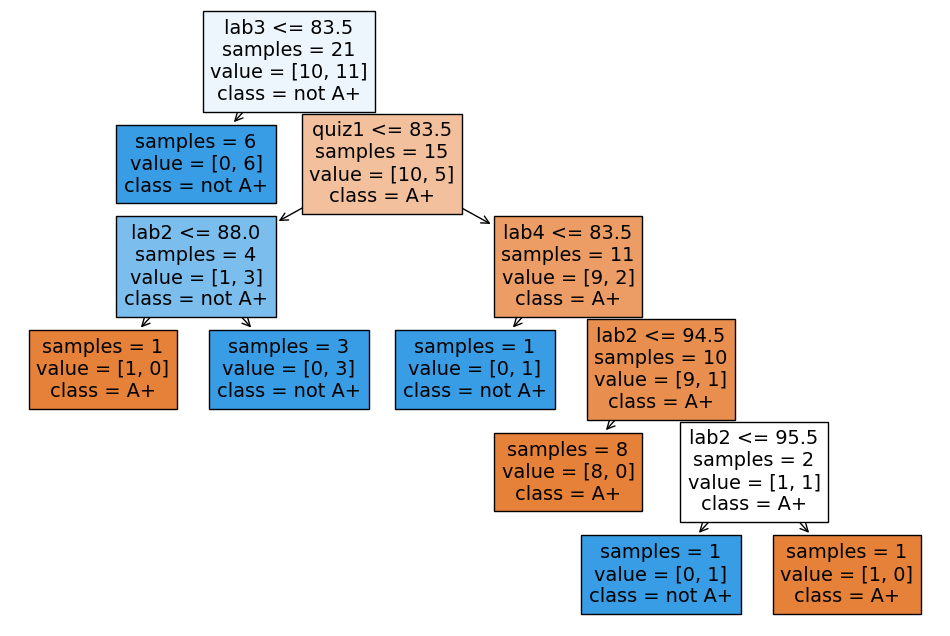

In [43]:
display_tree(model);

- With the default setting, the nodes are expanded until all leaves are "pure", i.e. they only contain one class each.
- The decision tree is creating very specific rules, based on just one example from the data. 
- We have seen that the decision tree model already automatically identified its parameters. So is it possible to control the learning process in any way? 
    - Yes, via **hyperparameters**!

### Hyperparameters

Hyperparameters refers to the options that we can control to guide how the decision tree algorithm goes about finding its parameters (the feature order and split values).

#### `max_depth`

One hyperparameter is the max depth of the tree, which is the length of the longest path from the tree root to a leaf. So far the tree have always expanded until they have all samples in the same leaf, or run out of features to split on. However, sometimes we might want the model tree to be less specific and stop earlier (we will learn more about this later).

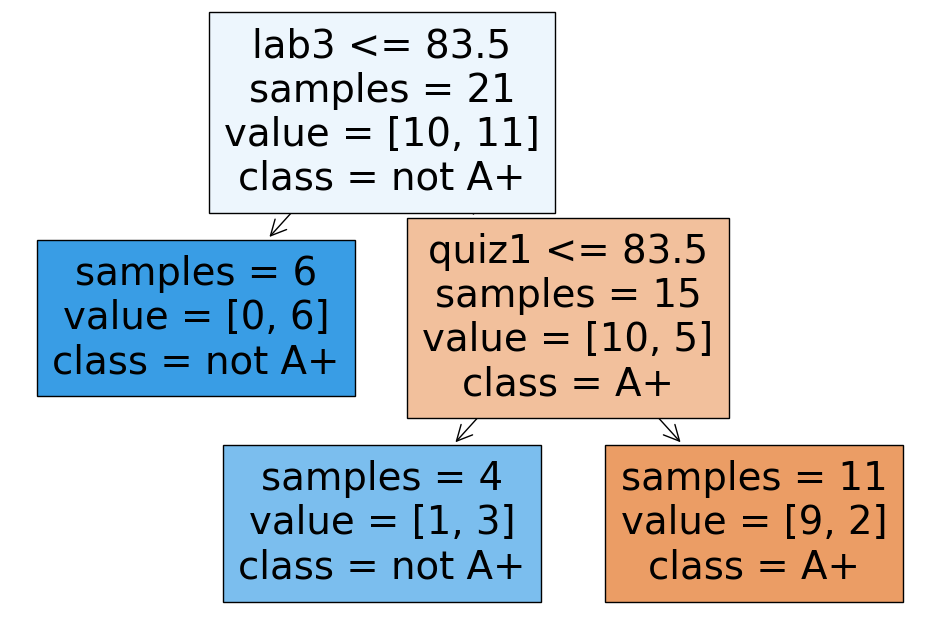

In [44]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X, y)
display_tree(model);

We can see that now there is only two layers.

#### `criterion`

To control the criteria that is used to compute how the splits are made, we can use the `criterion` hyperparameter.
In this case it doesn't change the parameters that the tree algorithm finds.

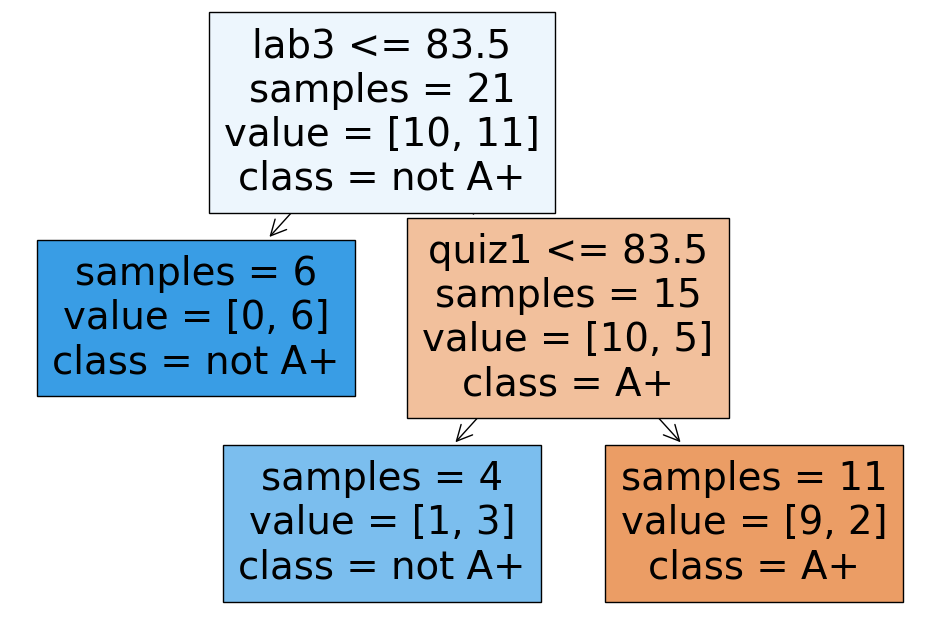

In [45]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=2)
model.fit(X, y)
display_tree(model);

### Parameters and hyperparameters: Summary 
**Parameters**
: When you call `fit`, a bunch of values get set, like the features to split on and split thresholds. These are called **parameters**. These are learned by the algorithm from the data during training. We need them during prediction time. 

**Hyperparameters**
: Even before calling `fit` on a specific data set, we can set some "knobs" that control the learning. These are called **hyperparameters**. These are specified based on: expert knowledge, heuristics, or systematic/automated optimization (more on this in the coming lectures).    

<br><br>

<br><br><br><br>

## Final comments, summary, and reflection

What did we learn today? 

- There is a lot of terminology and jargon used in ML. Some of the basic 
terminology includes:
    - Features, target, examples, training
    - Supervised vs. Unsupervised machine learning     
    - Classification and regression    
    - Accuracy and error    
    - Parameters and hyperparameters
    - Decision boundary 

- Baselines and steps to train a supervised machine learning model 
    - Baselines serve as reference points in ML workflow. 

- Decision trees    
    - are models that make predictions by sequentially looking at features and checking whether they are above/below a threshold
    - learn a hierarchy of if/else questions, similar to questions you might ask in a 20-questions game.       
    - learn axis-aligned decision boundaries (vertical and horizontal lines with 2 features)    
    - One way to control the complexity of decision tree models is by using the depth hyperparameter (`max_depth` in `sklearn`). 

<br><br>

### Reflection

Write your reflections (takeaways, struggle points, and general comments) on this material in [the reflection Google Document](https://docs.google.com/document/d/1McJCxNkXWfxwSch-DSwXqHS0nyTax7ASt5QJiUFJhPc/edit?usp=sharing) so that I'll try to address those points in the next lecture. 

![](img/eva-logging-off.png)
